CareerFoundry 6.5 Advanced Analytics & Dashboard Design Unsupervised Machine Learning: Clustering

 #  OUTLINE OF  THIS JUPYTER NOTEBOOK

1. Importing the various Libraries
2. Hypothesis Section
3. Data prep for k-means, elbow and clustering
4. This section covers the Elbow Technique
5. This part of the notebook is applying the standardization
6. The K-means which is clustering and modeling on the standardization
7. This is the cluster plotting section
8. Summary section
9. Export data section

# 1. Importing the various libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab module- bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

File Path and Importing the data

In [3]:
File Path and Importing the data

SyntaxError: invalid syntax (877845491.py, line 1)

In [4]:
# importing the file that was from 6.4 part 3 ***Note: the name from choc_bar_ratings_df_clean6 was 
# because the data was again cleaned and re-saved in the last jupyter notebook
choc_bar_ratings_df_clean6= pd.read_csv(r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\choc_bar_ratings_df_clean5.csv')

Double checking the data 

In [5]:
# running this to assess the data frame 
choc_bar_ratings_df_clean6.shape

(2657, 13)

In [6]:
# running this to assess the data frame
choc_bar_ratings_df_clean6.describe()

,Review Date,Cocoa Percent,Rating,Num_of_Ingredients,Ingredient Level
count,2656.000000,2657.000000,2657.000000,2657.000000,2657.000000
mean,2014.750753,0.716131,3.197591,2.928867,2.928867
std,4.220790,0.055345,0.445871,1.037975,1.037975
min,2006.000000,0.420000,0.000000,0.000000,0.000000
25%,2012.000000,0.700000,3.000000,2.000000,2.000000
50%,2015.000000,0.700000,3.250000,3.000000,3.000000
75%,2018.000000,0.740000,3.500000,4.000000,4.000000
max,2023.000000,1.000000,4.000000,6.000000,6.000000


In [7]:
# checking the head of the imported data and assesing the imported data frame
choc_bar_ratings_df_clean6.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Num_of_Ingredients,Specific Ingredients,Cocoa Level,Ingredient Level,Rating Level
0,Manoa,U.S.A.,2012.0,Liberia,"Liberia, batch 174",0.76,"molassses, intense, off, herb",3.25,3,"B,S,C",0,3,Mid-level
1,Manoa,U.S.A.,2012.0,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.76,"oily, tangy, fruit, earthy",2.75,3,"B,S,C",0,3,Mid-level
2,Manoa,U.S.A.,2012.0,Peru,"Piura, batch 173",0.76,"banana, menthol, medicinal",3.00,3,"B,S,C",0,3,Mid-level
3,Manoa,U.S.A.,2012.0,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.68,"molasses, sweet, cocoa",3.25,3,"B,S,C",0,3,Mid-level
4,Nanea,U.S.A.,2013.0,U.S.A.,Criollo Blend,0.72,"sandy, spicy, earthy",3.50,0,NaN,0,0,Mid-level


In [8]:
# checking the head of the imported data and assesing the imported data frame
choc_bar_ratings_df_clean6.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Num_of_Ingredients,Specific Ingredients,Cocoa Level,Ingredient Level,Rating Level
0,Manoa,U.S.A.,2012.0,Liberia,"Liberia, batch 174",0.76,"molassses, intense, off, herb",3.25,3,"B,S,C",0,3,Mid-level
1,Manoa,U.S.A.,2012.0,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.76,"oily, tangy, fruit, earthy",2.75,3,"B,S,C",0,3,Mid-level
2,Manoa,U.S.A.,2012.0,Peru,"Piura, batch 173",0.76,"banana, menthol, medicinal",3.00,3,"B,S,C",0,3,Mid-level
3,Manoa,U.S.A.,2012.0,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.68,"molasses, sweet, cocoa",3.25,3,"B,S,C",0,3,Mid-level
4,Nanea,U.S.A.,2013.0,U.S.A.,Criollo Blend,0.72,"sandy, spicy, earthy",3.50,0,NaN,0,0,Mid-level


# 2. HYPOTHESIS
This is going back over a previous hypothesis.
Chocolate bars with the highest rating have a Middle Level amount of cocoa in them.
("<0.6: "Low percent")
(>= 0.6 and < 0.75: "Mid percent),
(>=0.75 and <1: "High percent"),
(1= "Completely Cocoa")

# 3. Data prep for k-means, elbow and clustering

In [9]:
# What this code is doing is removing unwanted column and non-numerical columns for k-means
new_means_df= choc_bar_ratings_df_clean6.drop (columns = [ 'Company (Manufacturer)','Company Location',
                        'Review Date', 'Country of Bean Origin','Specific Bean Origin or Bar Name',
                        'Cocoa Level','Ingredient Level','Rating Level','Specific Ingredients',
                        'Most Memorable Characteristics'], inplace=False)


In [10]:
# this code is assessing the new data frame, you can see that we have the
# 'cocoa percent', 'Rating', and 'Num_of_Ingredients'
new_means_df.head()

,Cocoa Percent,Rating,Num_of_Ingredients
0,0.76,3.25,3
1,0.76,2.75,3
2,0.76,3.00,3
3,0.68,3.25,3
4,0.72,3.50,0


In [11]:
# What this code is doing is being like a helper that does some
# math to tell you the average and middle values for the ratings,
# number of ingredients, and cocoa percent of your special chocolates.
# It gives you a quick summary of what's typical for these three things in your list.

new_means_df.agg({'Rating' :['mean', 'median'],'Num_of_Ingredients':['mean', 'median'],'Cocoa Percent': ['mean', 'median']})

,Rating,Num_of_Ingredients,Cocoa Percent
mean,3.197591,2.928867,0.716131
median,3.250000,3.000000,0.700000


# 4. This next section covers the Elbow Technique


This is figuring out the cluster range for 'Rating' and other exploratory charts

In [13]:
# What this code is doing is kinda like making a list of all the different ratings from your chocolates, 
# and the list is sorted from the smallest to the biggest. 
# this way, you can easily see all the different ratings your chocolates have, nicely organized.


sorted(new_means_df['Rating'].unique().tolist())

[0.0, 1.0, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0]

<Axes: xlabel='Rating', ylabel='Count'>

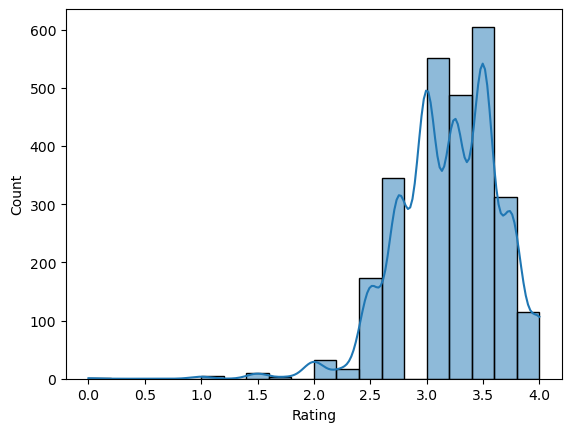

In [14]:
# What this code is doing is showing the values for 'Rating'

sns.histplot(new_means_df['Rating'], bins=20, kde = True)

<Axes: xlabel='Num_of_Ingredients', ylabel='Count'>

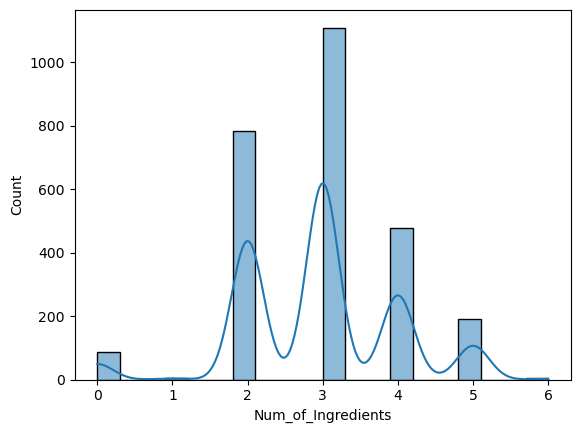

In [15]:
# What this code is doing is displaying the extreme values for 'Num_of_Ingredients'
sns.histplot(new_means_df['Num_of_Ingredients'], bins=20, kde = True)

<Axes: xlabel='Cocoa Percent', ylabel='Count'>

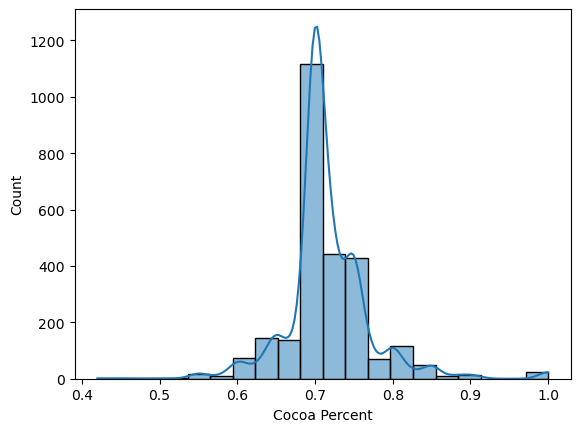

In [16]:
# What this code is doing is displaying the extreme values for 'Cocoa Percent'
sns.histplot(new_means_df['Cocoa Percent'], bins=20, kde = True) # shows extreme values for 'Cocoa Percent'

# 5.  This part of the notebook is applying the standardization

In [18]:
# What this code is doing is creating a brand new dataFrame to store the standardized data in 
new_means_df_standardized = new_means_df.copy()

# What this code is doing is standardizing the 'Num_of_ingredients' column
new_means_df_standardized['Num_of_Ingredients'] = (new_means_df_standardized['Num_of_Ingredients'] - new_means_df_standardized['Num_of_Ingredients'].mean()) / new_means_df_standardized['Num_of_Ingredients'].std()

# What this code is doing is standardizing the 'Cocoa Percent' column
new_means_df_standardized['Cocoa Percent'] = (new_means_df_standardized['Cocoa Percent'] - new_means_df_standardized['Cocoa Percent'].mean()) / new_means_df_standardized['Cocoa Percent'].std()

# What this code is doing is standardizing the 'Rating' column
new_means_df_standardized['Rating'] = (new_means_df_standardized['Rating'] - new_means_df_standardized['Rating'].mean()) / new_means_df_standardized['Rating'].std()


# 6. The K-means which is clustering and modeling on the standardization

In [19]:
#This code is defining the range of potential clusters in the data.
num_cl = range(1, 5) 

# This code is defining the k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [20]:
# What this code is doing is creating a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(new_means_df_standardized).score(new_means_df_standardized) for i in range(len(kmeans))] 

score 

C:\Users\rdpor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rdpor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rdpor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rdpor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-7968.000000000146,
 -6232.424599613131,
 -5110.971030979007,
 -4050.413211302241]

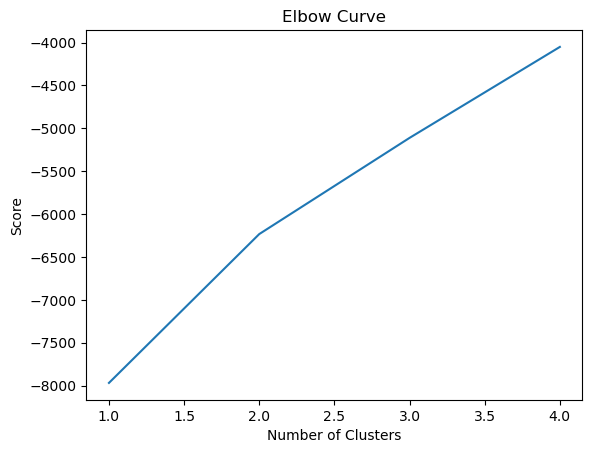

In [21]:
# What this code is doing is plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

 #. This elbow curve suggests that 2 clusters might have the best performance.  
 At the same time 3 clusters might also have a better score with still a good performance. 

In [22]:
# What this next line of code is doing is creating the k-means object.
kmeans = KMeans(n_clusters=3, n_init=10)

In [23]:
# what this code is doing is fitting the k-means object to the data. # Flin 19 clarify
kmeans.fit(new_means_df_standardized)

KMeans(n_clusters=3, n_init=10)

In [24]:
# What this code is doing is creating a new DataFrame for the cluster data with a different name 
cluster_result_df = new_means_df.copy()  # Copy the original data to the new DataFrame

# Add the 'clusters' column to df_clusters
cluster_result_df ['clusters'] = kmeans.fit_predict(new_means_df_standardized)



In [25]:
# Assessing the new 'cluster_result_df' data frame by seeing the head function and assessing the overall situation
cluster_result_df.head()

,Cocoa Percent,Rating,Num_of_Ingredients,clusters
0,0.76,3.25,3,0
1,0.76,2.75,3,1
2,0.76,3.00,3,1
3,0.68,3.25,3,0
4,0.72,3.50,0,0


In [26]:
# What this code is doing is kinda like asking your friend to count how many toys are in each box (cluster) 
# and tell you the numbers. It helps anyone understand how many things are in each group or category.

cluster_result_df['clusters'].value_counts()

0    1376
1    1041
2     240
Name: clusters, dtype: int64

# 7. This is the cluster plotting section

This will be doing plotting of the 'Cocoa Percent' and the 'Rating' on the original values. 

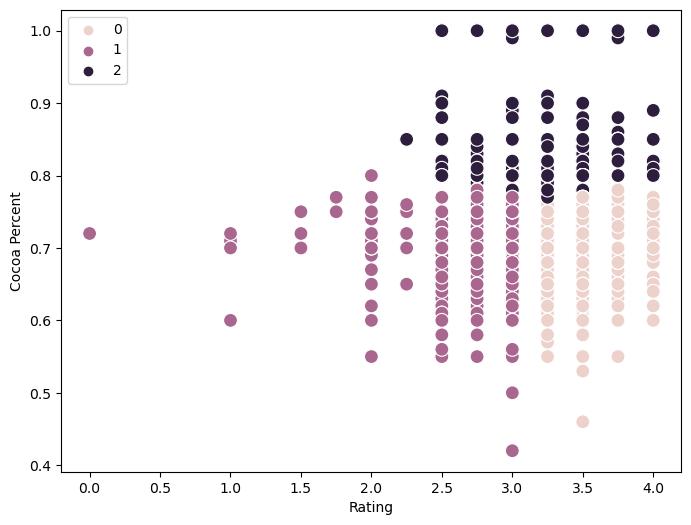

In [27]:
# Here is a cluster based on the original values,(df_cluster_result was made from a copy of the original df_fc4) 
# So this chart is a plot using original data via the standardized k-means model.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=cluster_result_df['Rating'], y=cluster_result_df['Cocoa Percent'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rating') # Label x-axis.
plt.ylabel('Cocoa Percent') # Label y-axis.
plt.show()

A. The TAN CLUSTER (which are the 0's) are regarding the 'Cocoa Percent' and the 'Rating' in the plot right above and are clustered togethed by a middle-range  'Cocoa Percent', however regarding the rating, it seems to land between 3.25 and 5. 

B. The PURPLE CLUSTER (which are the 1's) have a potential outlier in the '0' rating and approximately at 0.7 'Cocoa Percent'.  Then the purple cluster is really dense between the Rating of 1-3 and the Cocoa Percent ranges apporximately between 0.425 - 0.8.  The most dense part of the purple cluster is at a 2.5 Rating and a 0.7 Cocoa Percent. 

C. The BLACK CLUSTER (Which are the 2's) fall right between the 2.25-4.0 rating and their main Cocoa Percent is 0.8-1. 
Cocoa Percent is 

What this plot is doing is plotting the 'Num_of_Ingredients' and the 'Rating' on the original values. 

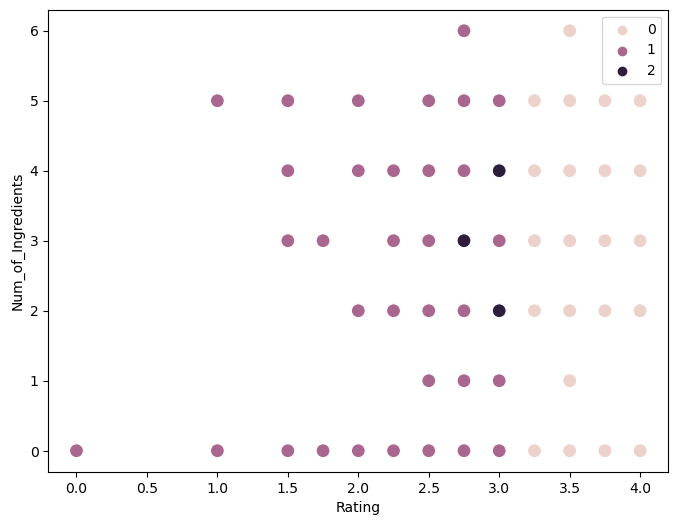

In [31]:
# This is a cluster that's based off of the Num_of_Ingredients and Rating ultimately creating a scatter plot
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=cluster_result_df['Rating'], y=cluster_result_df['Num_of_Ingredients'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Rating') 
plt.ylabel('Num_of_Ingredients')
plt.show()

It's helpful to see how the 0, 1, and 2 clusters end up being distributed throughout the scatterplot
We can see the following: 

- The 0's (TAN) fall mainly between the 3.0-4.0 Rating and regarding the Num_of_Ingredients span approximately between 0-6. 
- The 1's (PURPLE) fall mainly between the 0-3 Rating and regarding the Num_of_Ingredients span approximately between 0-6 with the majority in the 2-5 range for Num_of_Ingredients. 
- The 2's (Black) are approximately at the 2.75 Rating and the Num_of_Ingredients are between 2-4. 

Ultimately we can see that the Num_of_Ingredients does effect the rating but not in an extreme detrimental amount

In [ ]:
# ramon pick up here from after your break 

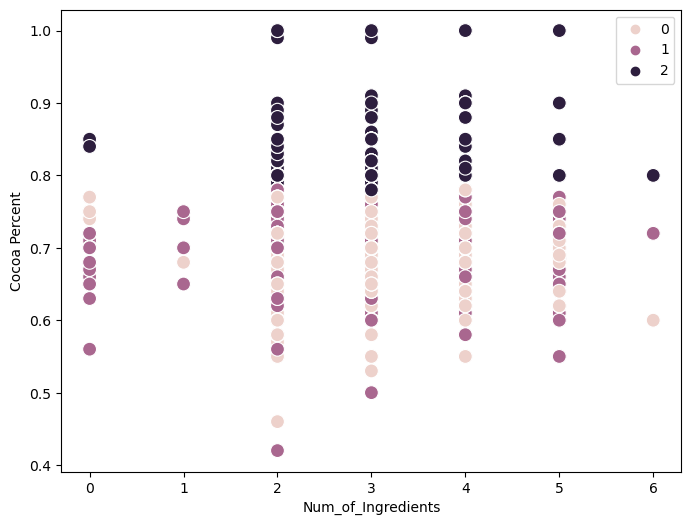

In [29]:
# What this code  is doing is kinda like asking your friend to draw a 
# special picture that helps you see if different chocolate bars
# form groups based on the number of ingredients and the cocoa percentages.
# Each dot represents a chocolate bar, and the colors help you see which group they belong to.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=cluster_result_df['Num_of_Ingredients'], y=cluster_result_df['Cocoa Percent'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Num_of_Ingredients') # Label x-axis.
plt.ylabel('Cocoa Percent') # Label y-axis.
plt.show()

It's helpful to see how the 0, 1, and 2 clusters end up being distributed throughout the Cocoa Percentage and 
Num_of_Ingredients scatterplo.  

We can see the following: 

- The 0's (TAN) fall mainly between the 0-2 range for the Num_of_Ingredients  and  for the Cocoa Percent they mainly fall approximately between the 0.5-0.8


- The 1's (PURPLE) fall mainly between the 2-5 range for the Num_of_Ingredients (however they are spread out randomly) and  for the Cocoa Percent they mainly fall approximately between the 0.6-0.8. 

- The 2's (Black) fall mainly between the 2-4 range for the Num_of_Ingredients  and  for the Cocoa Percent they mainly fall approximately between the 0.8-0.9. 

Ultimately we can see that overall the Num_of_Ingredients is between 2-5 and the cocoa percent being 0.6-0.9.  

In [30]:
# What this code is doing is creating the data frame for descriptive analysis of the clusters by color.  

cluster_result_df.loc[cluster_result_df['clusters'] == 2, 'cluster'] = 'black'
cluster_result_df.loc[cluster_result_df['clusters'] == 1, 'cluster'] = 'purple'
cluster_result_df.loc[cluster_result_df['clusters'] == 0, 'cluster'] = 'tan'

In [71]:
# In summary, this code is kind like asking someone to open
# each box of chocolates, find out how good they are on average,
# how many ingredients they have on average, and the average
# cocoa percentage. Also, you have them check the middle values 
# (median) for these things in each box. This helps you understand 
# the typical qualities of chocolates in each group or box.


cluster_result_df.groupby('cluster').agg({'Rating' :['mean', 'median'],
                                'Num_of_Ingredients':['mean', 'median'],
                                'Cocoa Percent': ['mean', 'median']})

Rating        Num_of_Ingredients        Cocoa Percent       
             mean median               mean median          mean median
cluster                                                                
black    3.212851   3.25           2.943775    3.0      0.834378    0.8
purple   2.776405   2.75           2.968992    3.0      0.703639    0.7
tan      3.510719   3.50           2.896076    3.0      0.704102    0.7

# 8. SUMMARY 

There's various things to go over in the summary of this particular analysis for 6.5.  The analysis have been created on the numerical data from the three columns from the original data set from the Flavors of Cacoa Website.  Though there are patterns and trends with the overall ratings, it's possible that the individual preferences for taste for the chocolate bars are one of the most important things.  It is posssible that the categorical columns 'Most Memorable Characteristics', 'Specific Ingredients', and 'Specific Bean Origin or Bar Name' have a big effect on the overal 'Rating'/ Tastiness of the bar. 

# 9. EXPORTING THE DATA

In [76]:
cluster_result_df.to_csv(os.path.join(r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\cluster_result_df.csv'), index=False)